In [2]:
#Importing Moving Least Squares Algorithm
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import math


#Defining the weight function
def weight(x):
    if (x <= -1) or (x >= 1):
        return 0
    elif (x < -1/2):
        return 2*((x+1)**2)
    elif (x < 1/2):
        return -2*(x**2) + 1
    elif (x < 1):
        return 2*((x-1)**2)

#Defining the weight function scaled by delta
def weight_scaled(x,delta):
    return weight(x/delta)

#Defining the weight function's derivative
def dweight(x):
    if (x <= -1) or (x >= 1):
        return 0
    elif (x < -1/2):
        return 4*(x+1)
    elif (x < 1/2):
        return (-4*x)
    elif (x < 1):
        return 4*(x-1)

#Defining the weight function's derivative scaled by delta
def dweight_scaled(x,delta):
    return dweight(x/delta)

#Defining the weight function's second derivative
def ddweight(x):
    if (x <= -1) or (x >= 1):
    	return 0
    elif (x < -1/2):
        return 4
    elif (x < 1/2):
        return -4
    elif (x < 1):
        return 4

#Defining the weight function's second derivative scaled by delta
def ddweight_scaled(x,delta):
    return ddweight(x/delta)

class C_1_MLS_oracle:
	"""
	The purpose of this class is to take a set of points (x_i,y_i)
	for x_i, y_i in R and to represent the optimal MLS approximant
	s_{f,X} of degree m for these points. It is implicitly assumed
	that there exists some f such that f(x_i) = y_i for all i
	"""
	def __init__(self, points, delta, m=2):
		"""
		points: set of n (x,y) pairs represented as a n x 2
			NumPy array
		m: the degree for which we require unisolvency (see
			chapter 4 of Wendland)
		delta: float, represents scaling factor
		"""
		# Defining instance variables delta, m, and points
		self.m = m
		self.delta = delta
		self.points = points

		# Default value for parameter d
		self.d = 0.01

		# Calculation of matrix P_complete
		total_rows = points.shape[1]
		P_complete = np.matrix(np.empty(shape=(total_rows,m+1)))		
		for i in range(0,m+1):
			for j in range(0, points.shape[1]):
				P_complete[j,i] = points[0,j]**i

		# Calculation of matrix F_complete
		F_complete = points[1]

		#Defining instance variables to be accessed later
		self.F = F_complete
		self.P = P_complete

	def eval(self, x):
		"""
		Given a real number x, return the MLS approximant for f
		at x.
		"""
		#Importing instance variables to use in calculations
		m = self.m
		delta = self.delta
		points = self.points
		#d = self.d 
		F_complete = self.F
		P_complete = self.P

	
		# Calculation of I_indices, array which includes indices j_0,...,j_n 
		# Calculation of I_values which includes x_(j_0),...,x_(j_n)
		list = []
		I_indices = np.array(list)
		I_values = np.array(list)

		total_rows = points.shape[1]
		for i in range(0, total_rows):
			if abs(points[0,i] - x) < delta:
				I_indices = np.append(I_indices,i)
				I_values = np.append(I_values,points[0,i])
		
		#Calculation of #(x), the size of the set I(x)
		pound = I_values.shape[0]
		if pound==0:
			return "Initial input x is too far from data for this value of delta. No values to compute."

		# Calculation of matrix R(x)
		R = np.empty(shape=(m + 1,1))
		for i in range(0,m + 1):
			R[i,0]=x**i
		
		## Calculation of matrix D, diagonal matrix with entries equal
		# to weight function evaluated at points in I_values 
		D = np.matrix(np.zeros(shape=(pound,pound)))
		for i in range(0, pound):
			D[i,i] = weight_scaled(I_values[i],delta)
		
		is_all_zero = np.all((D == 0))
		if is_all_zero:
			return "Weight function returned all zeroes. Delta is too small."

		print(D)
		# Slicing matrix P_complete
		I_min = np.amin(I_indices)
		I_max = np.amax(I_indices)

		P = P_complete[int(I_min):int(I_max+1),]

		# Slicing matrix F_complete
		F = F_complete[int(I_min):int(I_max)+1]

		#Calculating the product p*(x)
		P_t = np.transpose(P)
		print(P_t)
		print(D)
		print(np.matmul(P_t,D))
		inv = np.linalg.inv(np.matmul(np.matmul(P_t,D),P))
		prod_1 = np.matmul(np.matmul(np.matmul(F,D), P), inv)
		p_star = np.matmul(prod_1,R)
		return p_star[0,0]
		
	

	def slope(self, x):
		"""
		Given a real number x, return the derivative for the MLS
		approximant for f at x.
		"""
		#Importing instance variables to use in calculations
		m = self.m
		delta = self.delta
		points = self.points
		#d = self.d 
		F_complete = self.F
		P_complete = self.P

	
		# Calculation of I_indices, array which includes indices j_0,...,j_n 
		# Calculation of I_values which includes x_(j_0),...,x_(j_n)
		list = []
		I_indices = np.array(list)
		I_values = np.array(list)

		total_rows = points.shape[1]
		for i in range(0, total_rows):
			if abs(points[0,i] - x) < delta:
				I_indices = np.append(I_indices,i)
				I_values = np.append(I_values,points[0,i])
		
		#Calculation of #(x), the size of the set I(x)
		pound = I_values.shape[0]
		if pound==0:
			return "Initial input x is too far from data for this value of delta. No values to compute."

		# Calculation of matrix R(x)
		R = np.empty(shape=(m + 1,1))
		for i in range(0,m + 1):
			R[i,0]=x**i
		
		## Calculation of matrix D, diagonal matrix with entries equal
		# to weight function evaluated at points in I_values 
		D = np.matrix(np.zeros(shape=(pound,pound)))
		for i in range(0, pound):
			D[i,i] = dweight_scaled(I_values[i],delta)
		
		is_all_zero = np.all((D == 0))
		if is_all_zero:
			return "Weight function returned all zeroes. Delta is too small."

		# Slicing matrix P_complete
		I_min = np.amin(I_indices)
		I_max = np.amax(I_indices)

		P = P_complete[int(I_min):int(I_max+1),]

		# Slicing matrix F_complete
		F = F_complete[int(I_min):int(I_max)+1]

		#Calculating the product p*(x)
		P_t = np.transpose(P)
		inv = np.linalg.inv(np.matmul(np.matmul(P_t,D),P))
		prod_1 = np.matmul(np.matmul(np.matmul(F,D), P), inv)
		p_star = np.matmul(prod_1,R)
		return p_star[0,0]


In [4]:
a = np.array([-2,-1,0,1,2])
b = np.array([0,3,4,3,0])
points = np.array([a,b])
MLS = C_1_MLS_oracle(points, 5, 2)
MLS.eval(3)

[[0.92 0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.92 0.  ]
 [0.   0.   0.   0.68]]
[[ 1.  1.  1.  1.]
 [-1.  0.  1.  2.]
 [ 1.  0.  1.  4.]]
[[0.92 0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.92 0.  ]
 [0.   0.   0.   0.68]]
[[ 0.92  1.    0.92  0.68]
 [-0.92  0.    0.92  1.36]
 [ 0.92  0.    0.92  2.72]]


-5.000000000000002

In [128]:
#Creating initial points
a = np.linspace(0,6, 10)
b = np.multiply(a,a)
points = np.array([a,b])

#Instance of MLS Class with degree 2, delta 10
MLS = C_1_MLS_oracle(points, 10, 2)

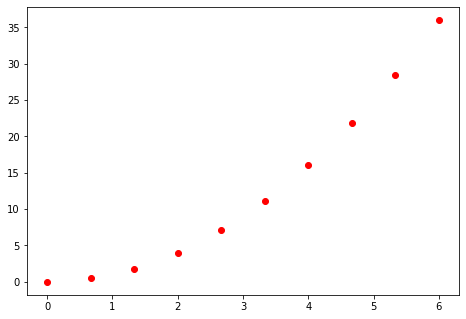

In [129]:
#Scatterplot of initial points
import matplotlib
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(a,b, color='r')
plt.show()

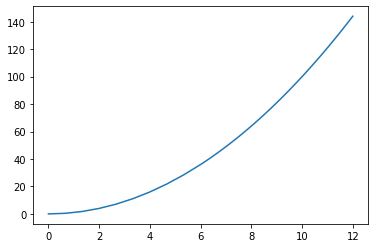

In [132]:
#Adding in test points, using approximation
c = np.linspace(6,12,100)
list = []
results = np.array(list)
for i in range(0,c.shape[0]):
    results= np.append(results,MLS.slope(c[i]))

c = np.append(a,c)
results = np.append(b,results)

#Plotting approximated values(6-12) and original data points (0-6)
plt.plot(c,results)

In [135]:
#Creating initial points
a = np.linspace(0,6, 10)
b = np.multiply(np.multiply(a,a),a)
points = np.array([a,b])

#Instance of MLS Class with degree 3, delta 10
MLS = C_1_MLS_oracle(points, 10, 3)

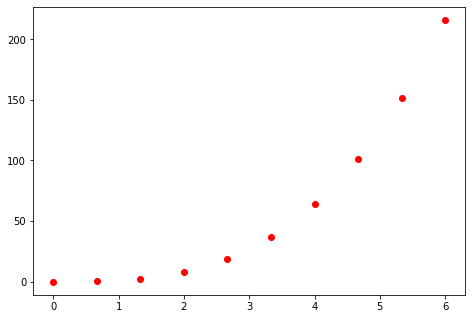

In [136]:
#Scatterplot of initial points
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(a,b, color='r')
plt.show()

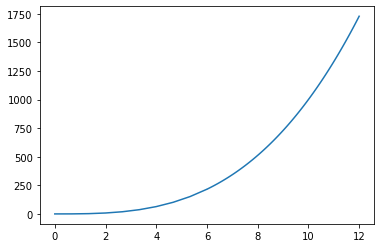

In [137]:
#Adding in test points, using approximation
c = np.linspace(6,12,100)
list = []
results = np.array(list)
for i in range(0,c.shape[0]):
    results= np.append(results,MLS.slope(c[i]))
    
#Plotting approximated values(6-12) and original data points (0-6)
c = np.append(a,c)
results = np.append(b,results)
plt.plot(c,results)

In [140]:
#Creating initial points
a = np.linspace(0.1,6, 10)
b = np.log(a)
points = np.array([a,b])

#Instance of MLS Class with degree 1, delta 10
MLS = C_1_MLS_oracle(points, 10, 0)

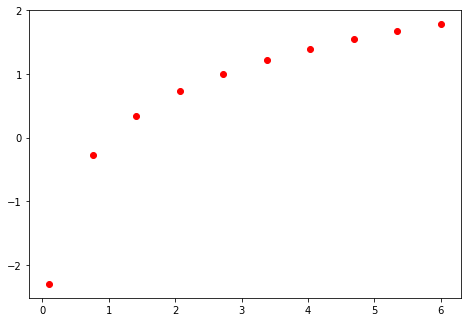

In [141]:
#Scatterplot of initial points
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(a,b, color='r')
plt.show()

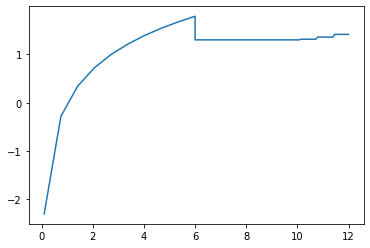

In [143]:
#Adding in test points, using approximation
c = np.linspace(6,12,100)
list = []
results = np.array(list)
for i in range(0,c.shape[0]):
    results= np.append(results,MLS.slope(c[i]))

#Plotting approximated values(6-12) and original data points (0-6)
c = np.append(a,c)
results = np.append(b,results)
plt.plot(c,results)

In [145]:
#Creating initial points
a = np.linspace(0,6, 20)
b = np.exp2(a)
points = np.array([a,b])

#Instance of MLS Class with degree 4, delta 10
MLS = C_1_MLS_oracle(points, 10, 4)

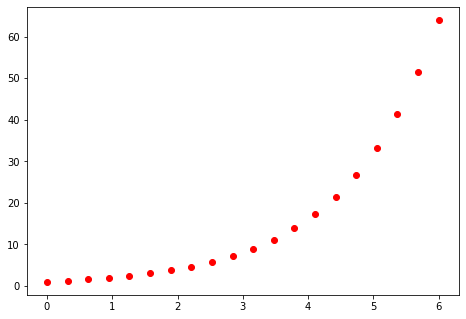

In [146]:
#Scatterplot of initial points
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(a,b, color='r')
plt.show()

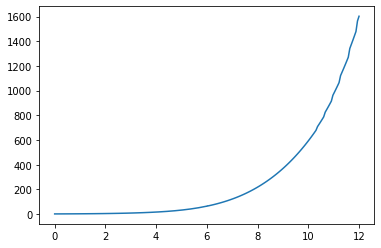

In [147]:
#Adding in test points, using approximation
c = np.linspace(6,12,100)
list = []
results = np.array(list)
for i in range(0,c.shape[0]):
    results= np.append(results,MLS.slope(c[i]))
    
#Plotting approximated values(6-12) and original data points (0-6)
c = np.append(a,c)
results = np.append(b,results)
plt.plot(c,results)